In [139]:
#reading the data set
training_set = read.csv("titanic_train.csv")

In [138]:
# checking the head of the data set
head(test_set)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [3]:
# let's see the dim of the data set
dim(training_set)

[1] 891  12

In [4]:
#checking the structure of the dataset
str(training_set)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [5]:
library(Amelia)

Warning message:
"package 'Amelia' was built under R version 3.5.2"Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2018 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


### Exploratory Data Analysis (EDA)
### Let's first explorehow much missing data we have, we can also use the Amelia pacakge for this purpose.

In [6]:
#help(missmap)

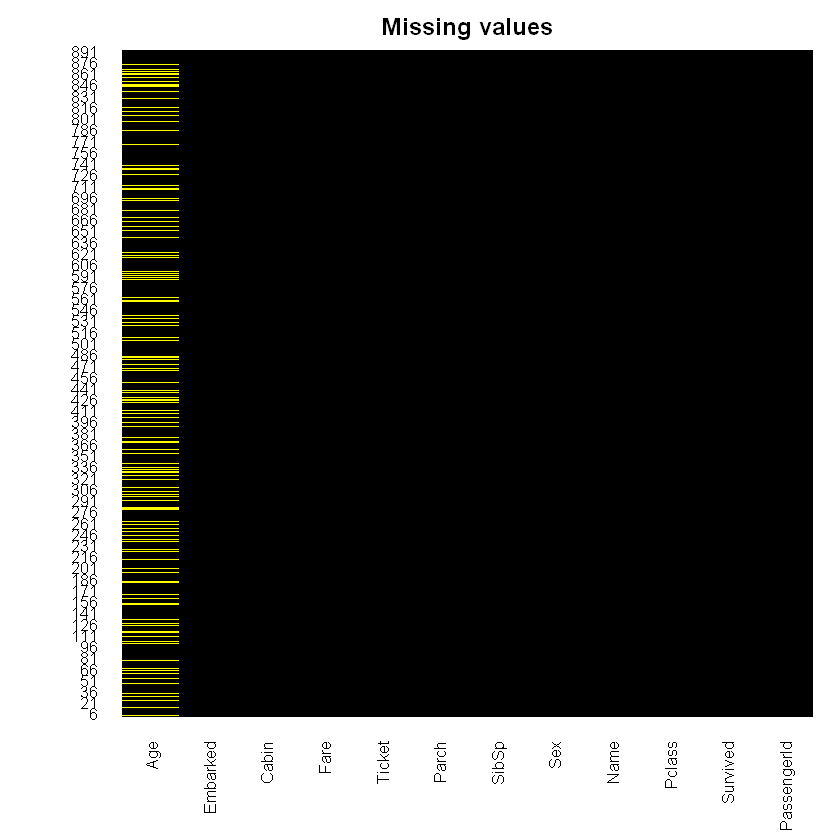

In [7]:
missmap(obj = training_set, col = c("yellow", 'black'),main = "Missing values", legend = FALSE)

### only the Age column has missing value, we can find how many age values are missing

In [8]:
sum(is.na(training_set))

[1] 177

In [9]:
table(is.na(training_set))


FALSE  TRUE 
10515   177 

In [10]:
sapply(training_set, function(x)sum(is.na(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

as seen, roughly 20 percent of the Age data is missing. The proportion of Age "missings" is likely small enough for reasonable replacement with some form of imputation.

# Data Visualization using ggplot2

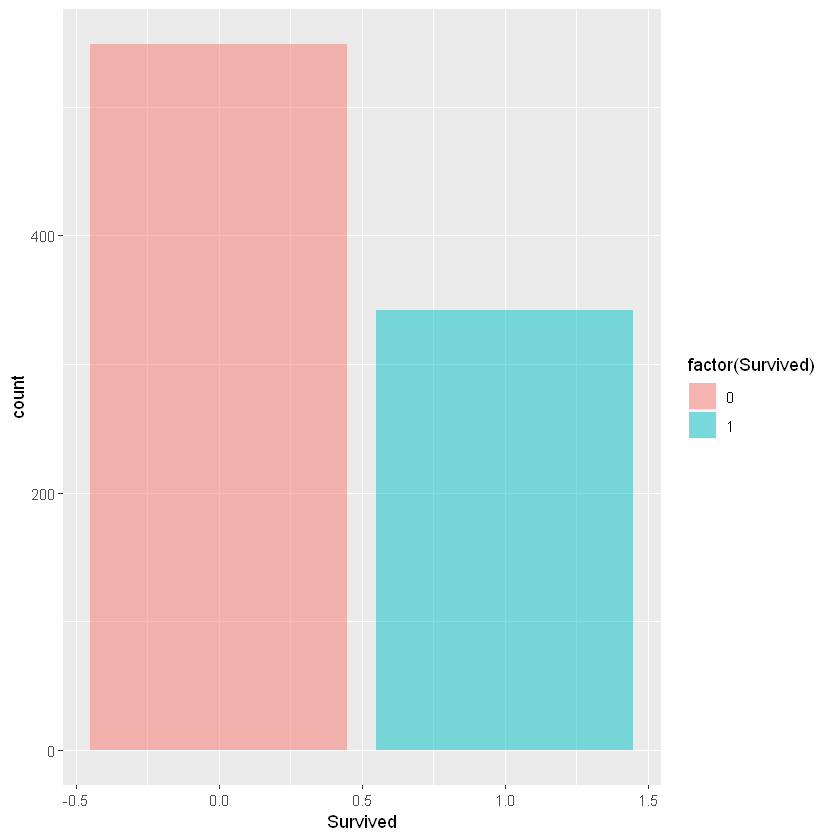

In [11]:
# let's see the count of survival and non-survival
library(ggplot2)

ggplot(data = training_set, aes(Survived)) +
    geom_bar(aes(fill = factor(Survived)), alpha = 0.5)

#### as shown, the number of survived are less

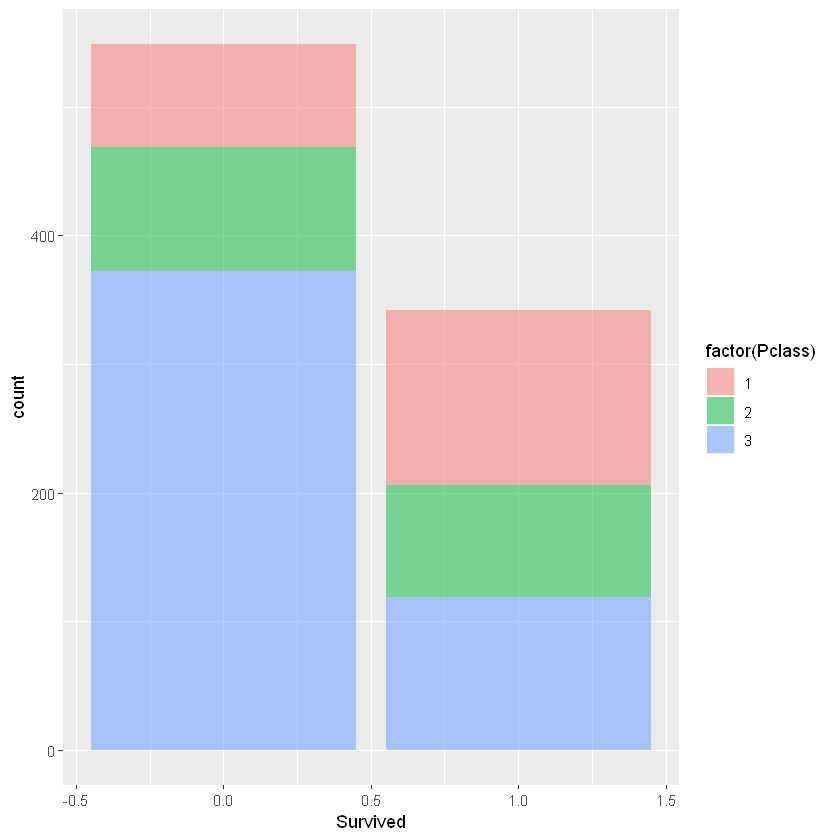

In [12]:
ggplot(data = training_set, aes(x = Survived)) +
geom_bar(aes(fill = factor(Pclass)), alpha = 0.5)

#### as shown, majority of survived passenger belonged to first 1.

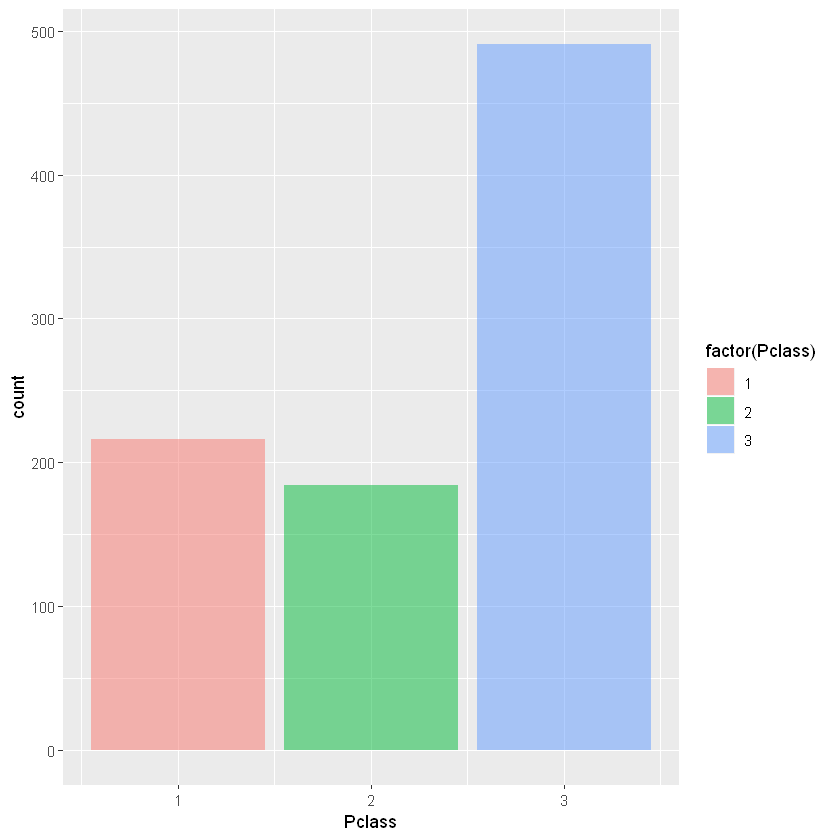

In [13]:
ggplot(data = training_set, aes(x = Pclass)) + geom_bar(aes(fill = factor(Pclass)), alpha = 0.5)

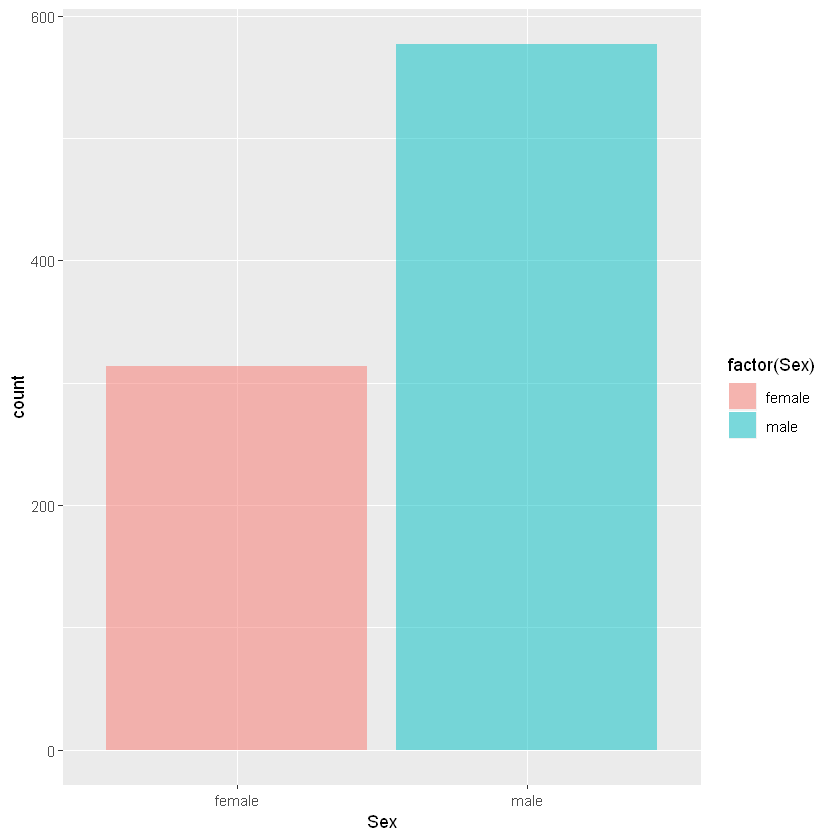

In [14]:
ggplot(data = training_set, aes(x = Sex)) + geom_bar(aes(fill = factor(Sex)), alpha = 0.5)

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

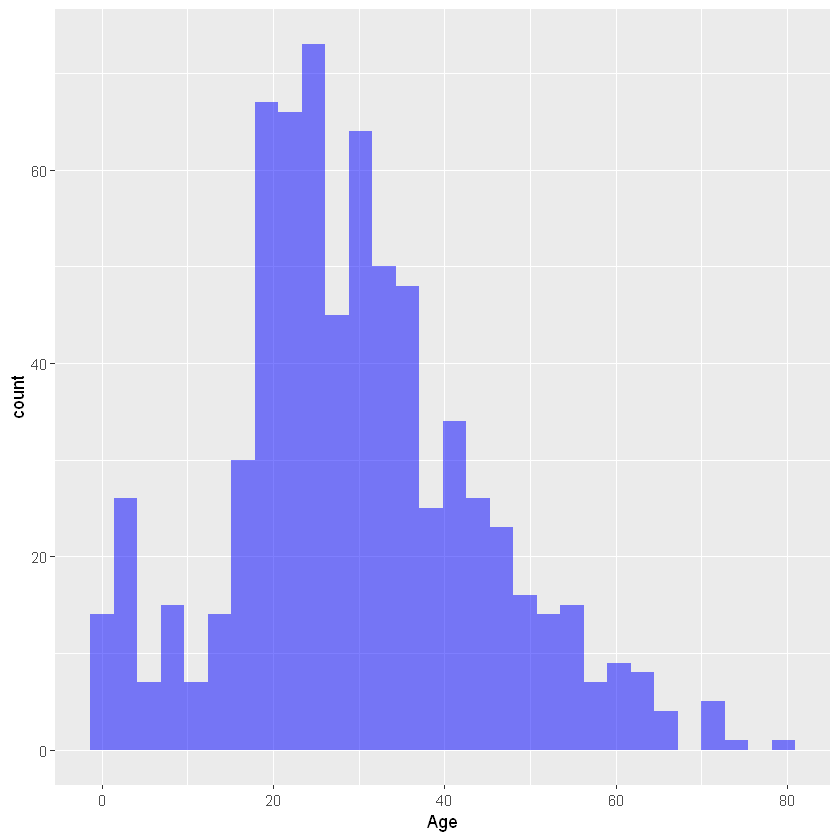

In [15]:
ggplot(data = training_set, aes(x = Age)) + geom_histogram(fill = 'blue',bins = 30, alpha = 0.5)

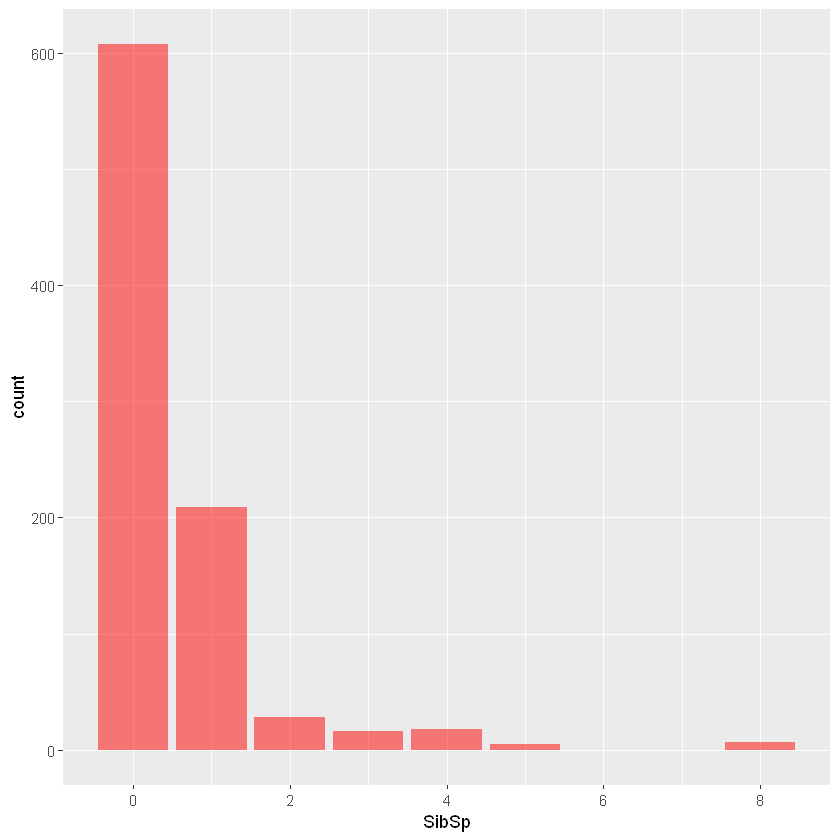

In [16]:
ggplot(data = training_set,aes(x = SibSp)) + geom_bar(fill='red',alpha=0.5)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


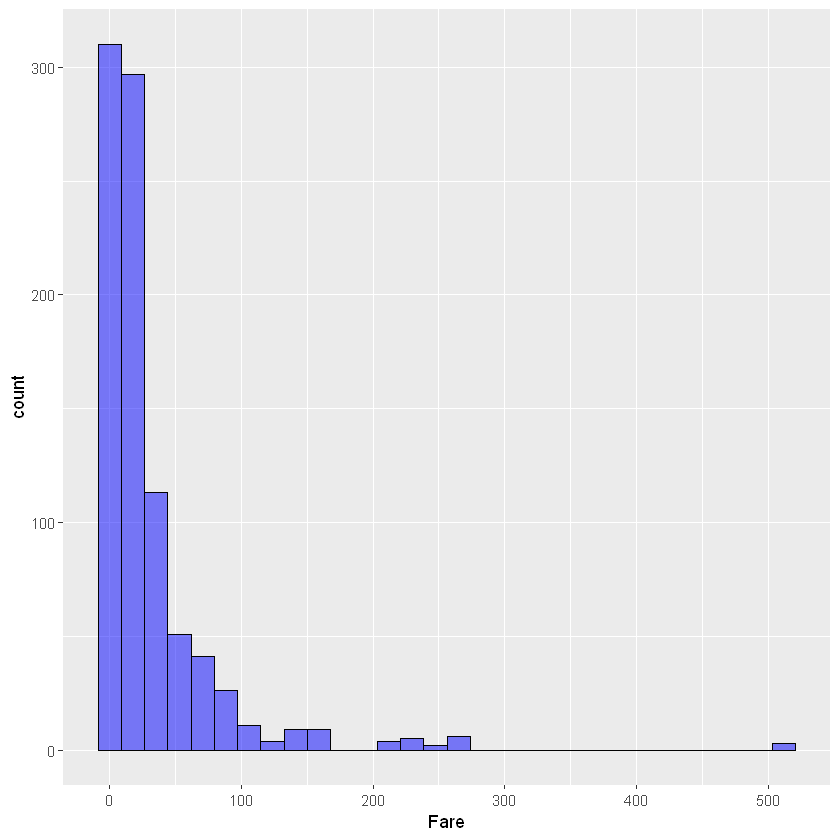

In [17]:
ggplot(data = training_set,aes(Fare)) + geom_histogram(fill='blue',color='black',alpha=0.5)

# Dealing the missing values in 'Age' column
we can either drop the missing values or fill the missing values with the mean of the column.
as we have three classes, we can fill the missing values with the mean of each class.

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

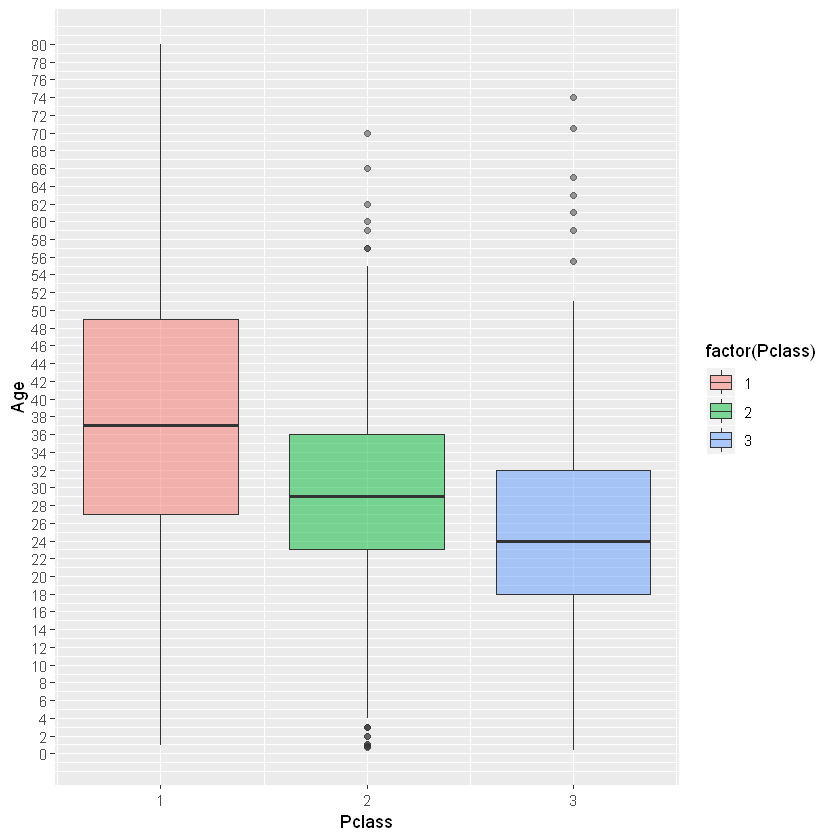

In [18]:
ggplot(training_set,aes(Pclass,Age)) + geom_boxplot(aes(group = Pclass, fill = factor(Pclass)), alpha = 0.5) +
scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

as we can, most of the richer passengers n the higher classes tend to be older. we'll use these averge age values to impute based on Pclass for age.

In [19]:
impute_age <- function(age,class){
    out = age
    for (i in 1:length(age)){
        
        if (is.na(age[i])){

            if (class[i] == 1){
                out[i] <- 37

            }else if (class[i] == 2){
                out[i] <- 29

            }else{
                out[i] <- 24
            }
        }else{
            out[i]<-age[i]
        }
    }
    return(out)
}

In [20]:
fixedAge = impute_age(training_set$Age, training_set$Pclass)

In [21]:
training_set$Age = fixedAge

## now let's check whether we have any null values in 'Age' column or not?

In [22]:
any(is.na(training_set$Age))

[1] FALSE

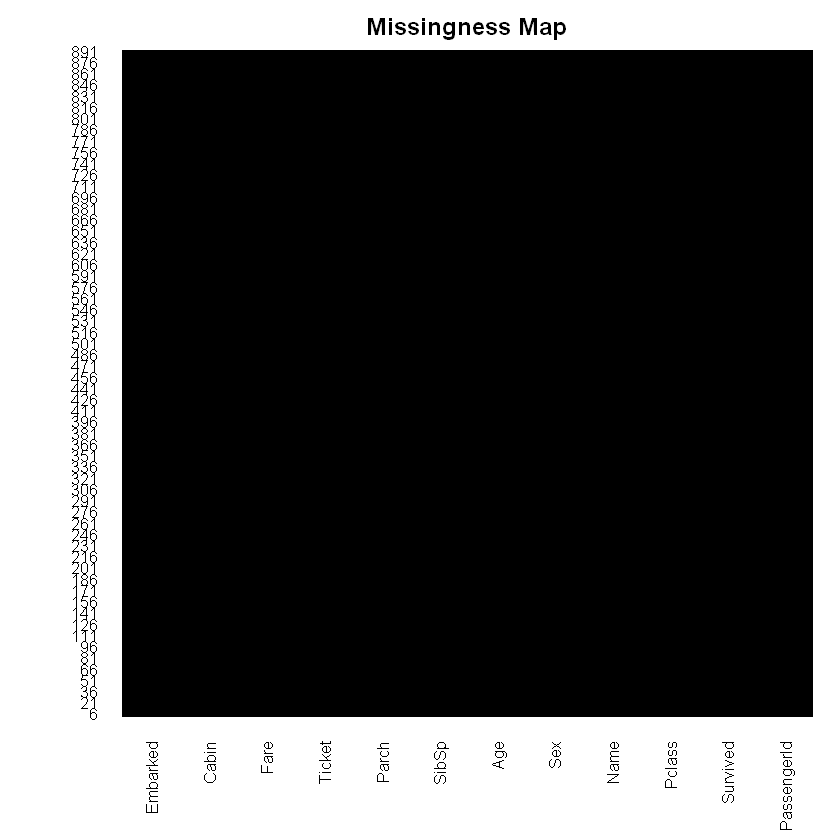

In [23]:
missmap(obj = training_set, legend = FALSE,col = c('green', 'black') )

### now, let's remove the features which are not required for model building.

In [24]:
library(dplyr)
training = select(training_set, -PassengerId,-Name,-Ticket,-Cabin, -Embarked)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [25]:
head(training)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22,1,0,7.2500
1,1,female,38,1,0,71.2833
1,3,female,26,0,0,7.9250
1,1,female,35,1,0,53.1000
0,3,male,35,0,0,8.0500
0,3,male,24,0,0,8.4583


In [26]:
str(training)

'data.frame':	891 obs. of  7 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...


In [27]:
# some of the column features are not in factor format.
# let's convert them into factor
training$Survived <- factor(training$Survived)
training$Pclass <- factor(training$Pclass)
training$Parch <- factor(training$Parch)
training$SibSp <- factor(training$SibSp)

In [28]:
# converting the 'Sex' Column into numeric
training$Sex = ifelse(training$Sex=="male", 1, 0)

In [29]:
head(training)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22,1,0,7.2500
1,1,0,38,1,0,71.2833
1,3,0,26,0,0,7.9250
1,1,0,35,1,0,53.1000
0,3,1,35,0,0,8.0500
0,3,1,24,0,0,8.4583


# Model Building with glm()

In [30]:
classifier = glm(formula = training$Survived ~. , data = training, family = binomial(link = 'logit'))

In [31]:
#let's check the summary of our model
summary(classifier)


Call:
glm(formula = training$Survived ~ ., family = binomial(link = "logit"), 
    data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8761  -0.6172  -0.4177   0.5970   2.4600  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.731e+00  4.906e-01   7.606 2.82e-14 ***
Pclass2     -1.155e+00  3.047e-01  -3.790 0.000151 ***
Pclass3     -2.197e+00  3.106e-01  -7.073 1.52e-12 ***
Sex         -2.718e+00  2.013e-01 -13.502  < 2e-16 ***
Age         -4.029e-02  8.736e-03  -4.611 4.00e-06 ***
SibSp1       6.746e-02  2.245e-01   0.300 0.763804    
SibSp2      -3.068e-01  5.357e-01  -0.573 0.566913    
SibSp3      -2.390e+00  7.178e-01  -3.329 0.000871 ***
SibSp4      -1.752e+00  7.665e-01  -2.285 0.022298 *  
SibSp5      -1.605e+01  9.564e+02  -0.017 0.986608    
SibSp8      -1.619e+01  7.548e+02  -0.021 0.982884    
Parch1       3.784e-01  2.893e-01   1.308 0.190953    
Parch2       8.439e-03  3.809e-01   0.022 0.982327    


### We can see clearly that Sex,Age, and Class are the most significant features

In [32]:
#install.packages("pscl")
library(pscl)
pR2(classifier)

Warning message:
"package 'pscl' was built under R version 3.5.2"Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


llh      llhNull           G2     McFadden         r2ML         r2CU 
-382.9683684 -593.3275684  420.7184000    0.3545414    0.3763630    0.5113595

In [33]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.5.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.5.2"

In [34]:
varImp(classifier)

,Overall
Pclass2,3.789958505
Pclass3,7.073061097
Sex,13.502225297
Age,4.611253859
SibSp1,0.300489705
SibSp2,0.572604010
SibSp3,3.329101057
SibSp4,2.285257091
SibSp5,0.016785457
SibSp8,0.021453288


# building an optimum model
### let's get rid of the features which are insignificant

In [35]:
# at first let's look at the correlation among the variables.
# if any variable which are highly correlates with each other
# one of them, need to be removed.
library("ggpubr")

Warning message:
"package 'ggpubr' was built under R version 3.5.2"Loading required package: magrittr


In [36]:
copy = data.frame(training)

In [37]:
copy$Survived = as.numeric(copy$Survived)
copy$Pclass = as.numeric(copy$Pclass)
copy$SibSp = as.numeric(copy$SibSp)
copy$Parch = as.numeric(copy$Parch)

In [38]:
str(copy)

'data.frame':	891 obs. of  7 variables:
 $ Survived: num  1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : num  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : num  1 0 0 0 1 1 1 1 0 0 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : num  2 2 1 2 1 1 1 4 1 2 ...
 $ Parch   : num  1 1 1 1 1 1 1 2 3 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...


In [39]:
cor(copy)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.00000000,-0.33848104,-0.54335138,-0.04725461,-0.02638493,0.08162941,0.2573065
Pclass,-0.33848104,1.00000000,0.13190049,-0.40848699,0.07814137,0.01844267,-0.5494996
Sex,-0.54335138,0.13190049,1.00000000,0.07842086,-0.12316372,-0.24548896,-0.1823328
Age,-0.04725461,-0.40848699,0.07842086,1.00000000,-0.26096468,-0.17109485,0.1237837
SibSp,-0.02638493,0.07814137,-0.12316372,-0.26096468,1.00000000,0.42333829,0.1632538
Parch,0.08162941,0.01844267,-0.24548896,-0.17109485,0.42333829,1.00000000,0.2162249
Fare,0.25730652,-0.54949962,-0.18233283,0.12378372,0.16325376,0.21622494,1.0000000


Warning message:
"package 'ggcorrplot' was built under R version 3.5.2"

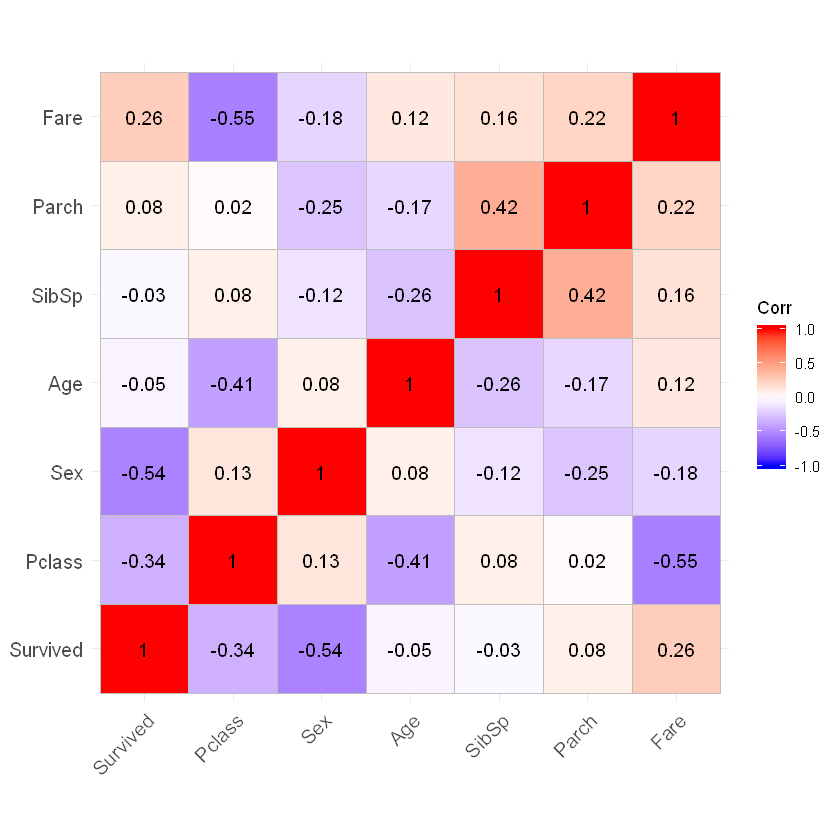

In [40]:
library(ggcorrplot)
ggcorrplot(cor(copy), lab = TRUE)

In [49]:
# Multicollinearity
#install.packages("usdm")
library(usdm)
#?viv
vif(copy)

Variables,VIF
Survived,1.657679
Pclass,1.931226
Sex,1.519158
Age,1.356931
SibSp,1.317518
Parch,1.321441
Fare,1.596631


In [51]:
vifstep(copy[-1], th = 10)

No variable from the 6 input variables has collinearity problem. 

The linear correlation coefficients ranges between: 
min correlation ( Parch ~ Pclass ):  0.01844267 
max correlation ( Fare ~ Pclass ):  -0.5494996 

---------- VIFs of the remained variables -------- 
  Variables      VIF
1    Pclass 1.768671
2       Sex 1.102173
3       Age 1.307652
4     SibSp 1.300229
5     Parch 1.319921
6      Fare 1.594193

In [52]:
#Select the model obtained from VIF for stepwise
library(MASS)
step=stepAIC(classifier, direction="both")

Warning message:
"package 'MASS' was built under R version 3.5.2"
Attaching package: 'MASS'

The following objects are masked from 'package:raster':

    area, select

The following object is masked from 'package:dplyr':

    select



Start:  AIC=801.94
training$Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare

         Df Deviance     AIC
- Parch   6   774.45  798.45
- Fare    1   767.14  801.14
<none>        765.94  801.94
- SibSp   6   791.95  815.95
- Age     1   789.10  823.10
- Pclass  2   819.12  851.12
- Sex     1   993.04 1027.04

Step:  AIC=798.45
training$Survived ~ Pclass + Sex + Age + SibSp + Fare

         Df Deviance     AIC
- Fare    1   775.49  797.49
<none>        774.45  798.45
+ Parch   6   765.94  801.94
- SibSp   6   802.55  814.55
- Age     1   805.91  827.91
- Pclass  2   838.94  858.94
- Sex     1  1008.40 1030.40

Step:  AIC=797.49
training$Survived ~ Pclass + Sex + Age + SibSp

         Df Deviance     AIC
<none>        775.49  797.49
+ Fare    1   774.45  798.45
+ Parch   6   767.14  801.14
- SibSp   6   802.60  812.60
- Age     1   808.21  828.21
- Pclass  2   882.44  900.44
- Sex     1  1015.03 1035.03


In [126]:
str(training)

'data.frame':	891 obs. of  7 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : num  1 0 0 0 1 1 1 1 0 0 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...
 $ Parch   : Factor w/ 7 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 3 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...


In [127]:
opt_model = glm(training$Survived ~ Pclass + Sex + Age + SibSp, data = training, family = binomial(link = "logit"))

In [128]:
summary(opt_model)


Call:
glm(formula = training$Survived ~ Pclass + Sex + Age + SibSp, 
    family = binomial(link = "logit"), data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8928  -0.5972  -0.4152   0.6185   2.5029  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   4.130430   0.428922   9.630  < 2e-16 ***
Pclass2      -1.314418   0.269634  -4.875 1.09e-06 ***
Pclass3      -2.469048   0.260308  -9.485  < 2e-16 ***
Sex          -2.709552   0.196019 -13.823  < 2e-16 ***
Age          -0.045323   0.008349  -5.429 5.67e-08 ***
SibSp1        0.128998   0.210963   0.611  0.54089    
SibSp2       -0.171276   0.521623  -0.328  0.74265    
SibSp3       -2.136903   0.687689  -3.107  0.00189 ** 
SibSp4       -1.674552   0.743564  -2.252  0.02432 *  
SibSp5      -15.988273 958.419136  -0.017  0.98669    
SibSp8      -16.009465 754.526717  -0.021  0.98307    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion param

# Predicting using Test Cases

In [55]:
head(test_set)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


# we need to clean the test_set data likewise training_set data

In [141]:
#let's check the dim of the data
test_set = read.csv("test.csv")
head(test_set)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [142]:
# let's see the dim of the data
dim(test_set)

[1] 418  11

In [143]:
# removing the unwanted features
library(dplyr)
test <- dplyr::select(test_set, Pclass, Sex, Age, SibSp)

In [144]:
head(test)

Pclass,Sex,Age,SibSp
3,male,34.5,0
3,female,47.0,1
2,male,62.0,0
3,male,27.0,0
3,female,22.0,1
3,male,14.0,0


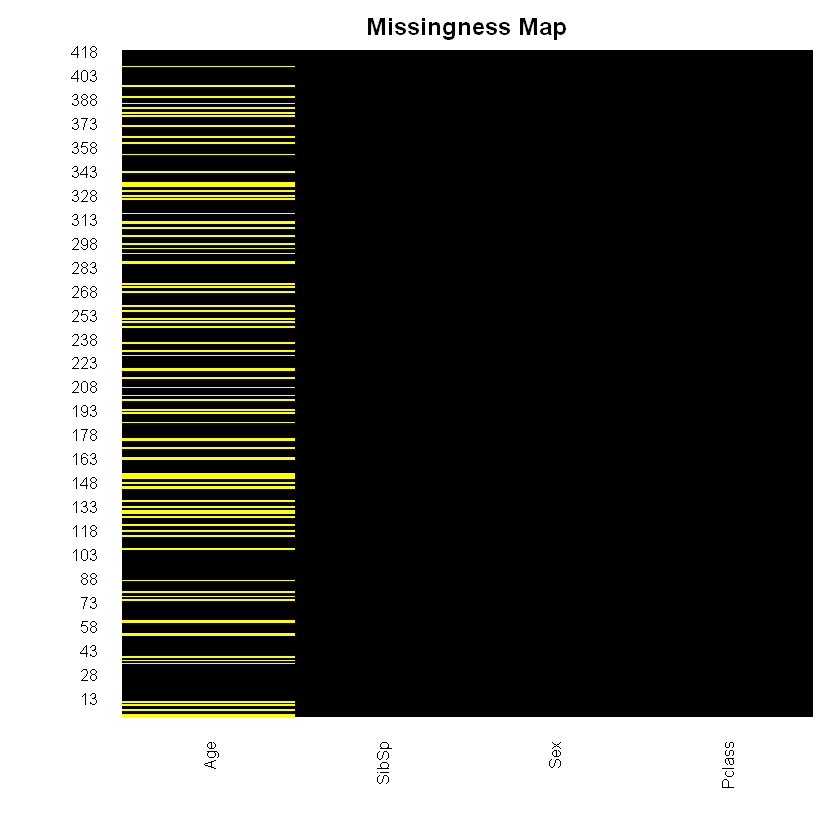

In [145]:
# Dealing with the null values
missmap(obj = test, col = c("yellow", "black"), legend = FALSE)

Warning message:
"Removed 86 rows containing non-finite values (stat_boxplot)."

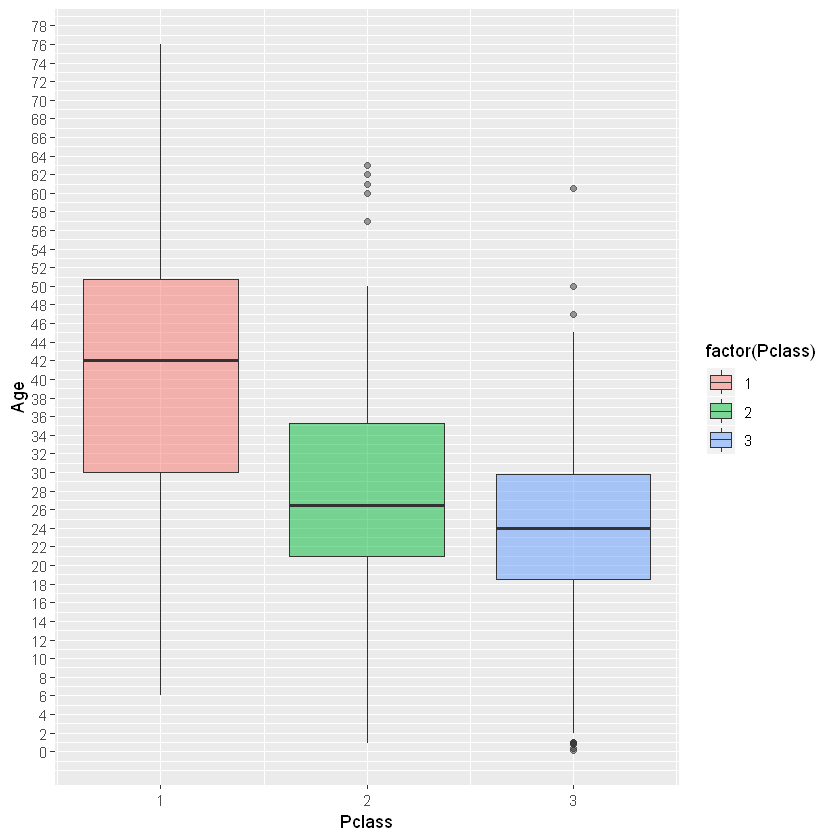

In [146]:
ggplot(data = test, aes(Pclass, Age)) +
geom_boxplot(aes(group=Pclass, fill = factor(Pclass)), alpha = 0.5) +
scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

In [147]:
impute_test_age = function(class, age){
    out = age
    for(i in 1:length(age)){
        if(is.na(age[i])){
            if(class[i] == 1){
                out[i] = 42
            }else if(class[i] ==2){
                out[i] = 28
            }else if(class[i] == 3){
                out[i] = 24
            }
        }else{
                out[i] = age[i]
            }
    }
        return (out)
}

In [148]:
age_fixed_test = impute_test_age(test$Pclass, test$Age)

In [149]:
test$Age = age_fixed_test

In [150]:
# let's see if we still have any null values
sapply(test, function(x) sum(is.na(test)))

Pclass    Sex    Age  SibSp 
     0      0      0      0

In [151]:
str(test)

'data.frame':	418 obs. of  4 variables:
 $ Pclass: int  3 3 2 3 3 3 3 2 3 3 ...
 $ Sex   : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age   : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp : int  0 1 0 0 1 0 0 1 0 2 ...


In [152]:
test$Pclass <- factor(test$Pclass)
test$SibSp <- factor(test$SibSp)
test$Sex <- ifelse(test$Sex == "male",1,0)

In [153]:
# Predicting the test data set
y_prob = predict(opt_model, newdata = test, type="response")

In [154]:
results = ifelse(y_prob > 0.5,1,0)

In [159]:
print(results)

  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   1   0   1   0   1   0   0   0   1   0   1   1   0   0   1   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   1   1   1   0   1   0   0   0   0   0   1   1   1   0   1   1   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   1   1   0   0   0   1   1   1   0   1   1   0   0   0   0   0   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   1   1   1   1   0   1   1   1   0   1   1   1   0   0   1   0   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   1   1   1   1   1   0   1   0   1   0   1   0   1   0 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  1   0   0   0   1   0   0   0   0   0   0   1   1   1   1   0   0   1   0   1 
121 122 123 124 125 126 127 